In [1]:
!pip install --upgrade jax

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 MB 18.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.26.dev20240620
    Uninstalling jaxlib-0.4.26.dev20240620:
      Successfully uninstalled jaxlib-0.4.26.dev20240620
  Attempting uninstall: jax
    Found existing installation: jax 0.4.26
    Uninstalling jax-0.4.26:
      Successfully uninstalled jax-0.4.26


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
directory = '/kaggle/input/realwaste7/RealWaste'

In [4]:
train=tf.keras.utils.image_dataset_from_directory(
    directory,
    color_mode='rgb',
    batch_size=16,
    subset="training",
    image_size=(524, 524),
    seed=123,
    shuffle=True,
    validation_split=0.2,
)

Found 4752 files belonging to 9 classes.
Using 3802 files for training.


In [5]:
test=tf.keras.utils.image_dataset_from_directory(
    directory,
    color_mode='rgb',
    batch_size=16,
    subset="validation",
    image_size=(524, 524),
    seed=123,
    shuffle=True,
    validation_split=0.2,
)

Found 4752 files belonging to 9 classes.
Using 950 files for validation.


In [6]:
inception_model = tf.keras.applications.InceptionV3(input_shape=(524,524,3), include_top=False, weights='imagenet')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
inception_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 524, 524,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 261, 261,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 261, 261,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 261, 261,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 259, 259,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 259, 259,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 259, 259,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 259, 259,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 259, 259,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 259, 259,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 129, 129,  │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 129, 129,  │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 129, 129,  │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 129, 129,  │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 127, 127,  │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 127, 127,  │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [8]:
new_model = tf.keras.models.Sequential()
new_model.add(tf.keras.layers.Rescaling(scale=1./127.5,offset=-1))
new_model.add(inception_model)

In [9]:
new_model.add(tf.keras.layers.Flatten())
new_model.add(tf.keras.layers.Dropout(0.3))
new_model.add(tf.keras.layers.Dense(256, activation="relu"))
new_model.add(tf.keras.layers.Dense(9, activation="softmax"))

In [10]:
new_model.build(input_shape=(1,524,524,3))

In [11]:
loss_function='sparse_categorical_crossentropy'
optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00001)
metrics=['accuracy']

In [12]:
new_model.compile(loss=loss_function, optimizer=optimizer, metrics=metrics)

In [13]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (1, 524, 524, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (1, 15, 15, 2048)      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (1, 460800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 460800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 256)               │   117,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 9)                 │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,770,153 (533.18 MB)

 Trainable params: 139,735,721 (533.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [14]:
history = new_model.fit(
    train,
    epochs=10,
    batch_size=32,
    validation_data=(test)
)

Epoch 1/10


I0000 00:00:1727349317.875086     110 service.cc:145] XLA service 0x7e91b0003390 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727349317.875132     110 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-09-26 11:15:46.141094: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[192,80,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,80,129,129]{3,2,1,0}, f32[16,192,127,127]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-09-26 11:15:46.512076: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.371087672s
Trying algorithm eng0{} for conv (f32[192,

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.4563 - loss: 1.6464

I0000 00:00:1727349500.228629     110 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_56', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_38', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_37', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_39', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_34', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_35', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_27', 4 by

238/238 ━━━━━━━━━━━━━━━━━━━━ 238s 618ms/step - accuracy: 0.4575 - loss: 1.6424 - val_accuracy: 0.7958 - val_loss: 0.5791
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 90s 377ms/step - accuracy: 0.9026 - loss: 0.2874 - val_accuracy: 0.8095 - val_loss: 0.5572
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 90s 377ms/step - accuracy: 0.9704 - loss: 0.1075 - val_accuracy: 0.8411 - val_loss: 0.4994
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 90s 377ms/step - accuracy: 0.9883 - loss: 0.0418 - val_accuracy: 0.8253 - val_loss: 0.5588
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 142s 377ms/step - accuracy: 0.9973 - loss: 0.0218 - val_accuracy: 0.8442 - val_loss: 0.5868
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 90s 377ms/step - accuracy: 0.9972 - loss: 0.0147 - val_accuracy: 0.8653 - val_loss: 0.4738
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 90s 377ms/step - accuracy: 0.9988 - loss: 0.0112 - val_accuracy: 0.8474 - val_loss: 0.5445
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 90s 376ms/step - accuracy: 0.9983 - loss: 0.0112 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


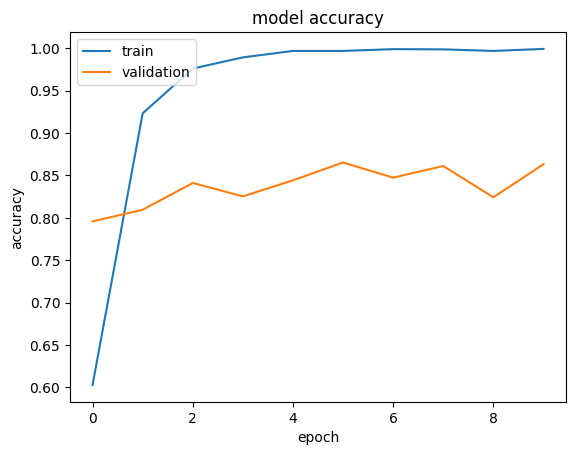

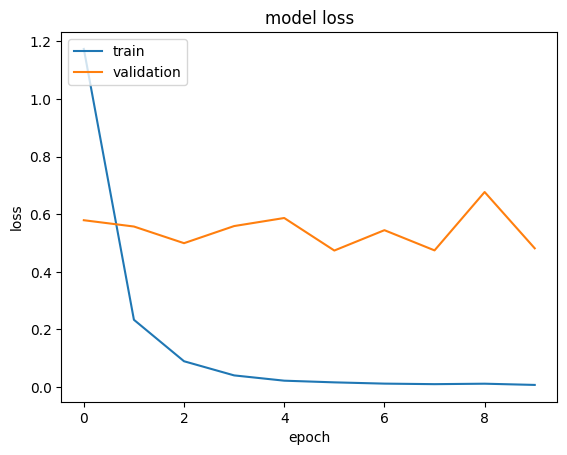

In [15]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Acc5.png')
plt.show();
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Loss5.png')
plt.show();

In [16]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in test:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = new_model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━

In [17]:
from sklearn.metrics import confusion_matrix

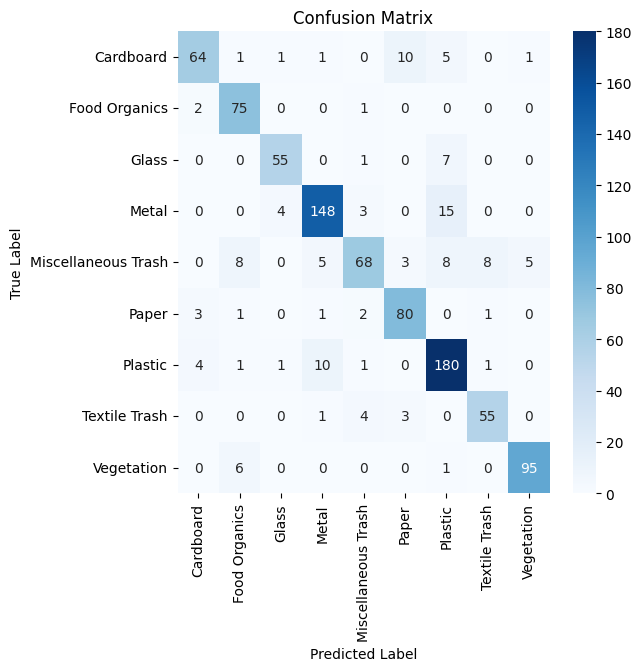

In [18]:
classes=['Cardboard','Food Organics','Glass','Metal','Miscellaneous Trash','Paper','Plastic','Textile Trash','Vegetation']

cm = confusion_matrix(correct_labels, predicted_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
new_model.save('inception_model_new2.keras')

In [20]:
pred_model = tf.keras.models.load_model('/kaggle/working/inception_model_new2.keras')

In [21]:
#test_img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/RealWaste/Food Organics/Food Organics_109.jpg')

In [22]:
#plt.imshow(test_img)

In [23]:
test_img = tf.keras.preprocessing.image.img_to_array(test_img)

NameError: name 'test_img' is not defined

In [ ]:
test_img = np.expand_dims(test_img, axis=0)

In [ ]:
import time
start_time=time.time()
prediction = pred_model.predict(test_img)
end_time=time.time()
duration= end_time-start_time
hours = duration // 3600
minutes = (duration - (hours * 3600)) // 60
seconds = duration - ((hours * 3600) + (minutes * 60))
print(f"training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds")
 # print out training duration time

In [ ]:
print(prediction)

In [ ]:
classes = np.argmax(prediction)

In [ ]:
classes = tf.squeeze(classes)
prediction = tf.squeeze(prediction)

In [ ]:
class_names = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash',
               'Paper', 'Plastic', 'Textile Trash', 'Vegetation']

In [ ]:
def plot_value_array( predictions_array, true_label):
    """
    This method will plot the percentage confidence score of each class prediction.

    Input:
        i: Index of the prediction to test
        predictions_array: Every prediction contain array of 10 number
        true_label: Correct image labels. In case of test data they are test_labels
    """
    true_label = true_label
    plt.grid(False)
    plt.xticks(range(9))
    plt.yticks([])
    thisplot = plt.bar(range(9), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
plot_value_array(prediction, classes)
_ = plt.xticks(range(9), class_names, rotation=90)
plt.show()